데이터 길이: 365 
앞쪽 5개 값: [[8818.6]
 [8800.3]
 [9317.2]
 [9662.7]
 [9942.7]]


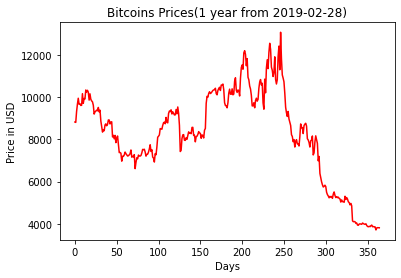

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f=open('bit-coin.csv','r',encoding='euc-kr')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['종가']].to_numpy()
print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[0:5])

plt.plot(seq,color='red')
plt.title('Bitcoins Prices(1 year from 2019-02-28)')
plt.xlabel('Days');plt.ylabel('Price in USD')
plt.show()

In [7]:
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

w=7
h=1

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0]); print(X[-1],Y[-1])


(358, 7, 1) (358, 1)
[[8818.6]
 [8800.3]
 [9317.2]
 [9662.7]
 [9942.7]
 [9655.7]
 [9684.5]] [9602.4]
[[3875.1]
 [3863. ]
 [3857.2]
 [3715.9]
 [3809.5]
 [3823.1]
 [3821.9]] [3816.6]


Epoch 1/200


2022-05-27 17:22:24.946309: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


250/250 - 1s - loss: 1163.3866 - mae: 1163.3866 - val_loss: 318.3122 - val_mae: 318.3122 - 623ms/epoch - 2ms/step
Epoch 2/200
250/250 - 0s - loss: 593.8391 - mae: 593.8391 - val_loss: 357.0832 - val_mae: 357.0832 - 278ms/epoch - 1ms/step
Epoch 3/200
250/250 - 0s - loss: 566.1132 - mae: 566.1132 - val_loss: 921.6819 - val_mae: 921.6819 - 272ms/epoch - 1ms/step
Epoch 4/200
250/250 - 0s - loss: 603.0670 - mae: 603.0670 - val_loss: 711.1277 - val_mae: 711.1277 - 275ms/epoch - 1ms/step
Epoch 5/200
250/250 - 0s - loss: 559.8040 - mae: 559.8040 - val_loss: 369.5227 - val_mae: 369.5227 - 269ms/epoch - 1ms/step
Epoch 6/200
250/250 - 0s - loss: 514.7276 - mae: 514.7276 - val_loss: 348.2360 - val_mae: 348.2360 - 269ms/epoch - 1ms/step
Epoch 7/200
250/250 - 0s - loss: 653.9890 - mae: 653.9890 - val_loss: 446.8571 - val_mae: 446.8571 - 299ms/epoch - 1ms/step
Epoch 8/200
250/250 - 0s - loss: 503.4806 - mae: 503.4806 - val_loss: 372.9203 - val_mae: 372.9203 - 303ms/epoch - 1ms/step
Epoch 9/200
250/25

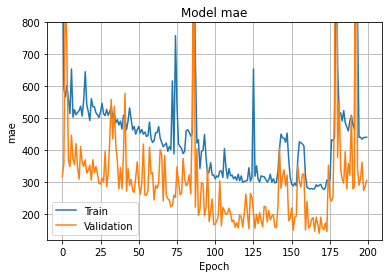

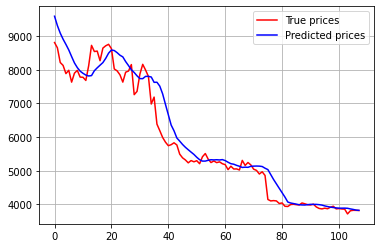

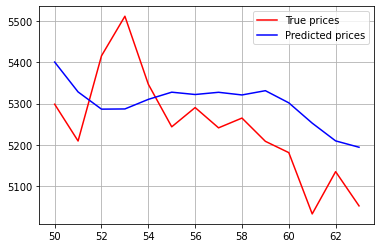

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f=open('bit-coin.csv','r',encoding='euc-kr')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['종가']].to_numpy()

def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

w=7
h=1

X,Y=seq2dataset(seq,w,h)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

split = int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0], "MAE:",ev[1])

pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title("Model mae")
plt.ylabel("mae")
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range],color='red')
plt.plot(x_range,pred[x_range],color='blue')
plt.legend(['True prices', 'Predicted prices'],loc='best')
plt.grid()
plt.show()

x_range=range(50,64)
plt.plot(x_range,y_test[x_range],color='red')
plt.plot(x_range,pred[x_range],color='blue')
plt.legend(['True prices', 'Predicted prices'],loc='best')
plt.grid()
plt.show()


(358, 7, 4) (358, 4)
[[8818.6 8800.1 8968.3 8538.5]
 [8800.3 9317.1 9368.1 8672. ]
 [9317.2 9662.6 9672.3 9269.8]
 [9662.7 9943.2 9981.  9507. ]
 [9942.7 9655.6 9965.6 9653.4]
 [9655.7 9684.5 9706.5 9569.8]
 [9684.5 9602.2 9747.1 9574.5]] [9602.4 9611.9 9681.4 9448.9]
Epoch 1/200


2022-05-28 01:19:05.942346: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


250/250 - 1s - loss: 1090.4595 - mae: 1090.4595 - val_loss: 465.6445 - val_mae: 465.6445 - 647ms/epoch - 3ms/step
Epoch 2/200
250/250 - 0s - loss: 531.8354 - mae: 531.8354 - val_loss: 349.9875 - val_mae: 349.9875 - 286ms/epoch - 1ms/step
Epoch 3/200
250/250 - 0s - loss: 512.2057 - mae: 512.2057 - val_loss: 343.2547 - val_mae: 343.2547 - 289ms/epoch - 1ms/step
Epoch 4/200
250/250 - 0s - loss: 532.3829 - mae: 532.3829 - val_loss: 356.6258 - val_mae: 356.6258 - 303ms/epoch - 1ms/step
Epoch 5/200
250/250 - 0s - loss: 511.4914 - mae: 511.4914 - val_loss: 299.9102 - val_mae: 299.9102 - 303ms/epoch - 1ms/step
Epoch 6/200
250/250 - 0s - loss: 669.0889 - mae: 669.0889 - val_loss: 271.4734 - val_mae: 271.4734 - 287ms/epoch - 1ms/step
Epoch 7/200
250/250 - 0s - loss: 580.1025 - mae: 580.1025 - val_loss: 443.8737 - val_mae: 443.8737 - 285ms/epoch - 1ms/step
Epoch 8/200
250/250 - 0s - loss: 604.7948 - mae: 604.7948 - val_loss: 275.9628 - val_mae: 275.9628 - 284ms/epoch - 1ms/step
Epoch 9/200
250/25

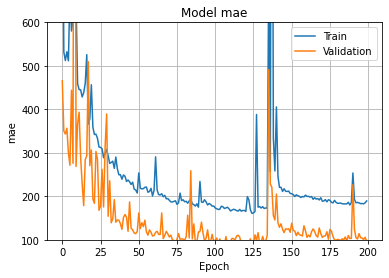

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f=open('bit-coin.csv','r',encoding='euc-kr')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['종가','오픈','고가','저가']].to_numpy()

def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

w=7
h=1

X,Y=seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

split = int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0], "MAE:",ev[1])

pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title("Model mae")
plt.ylabel("mae")
plt.xlabel('Epoch')
plt.ylim([100,600])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
